In [1]:
from utils import Clustering

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
clustering = Clustering(
    data_query="""
        SELECT
            user_id,
            ROUND(AVG(tv_rating), 2) AS avg_tv_rating,
            ROUND(AVG(ova_rating), 2) AS avg_ova_rating,
            ROUND(AVG(movie_rating), 2) AS avg_movie_rating,
            ROUND(AVG(special_rating), 2) AS avg_special_rating
        FROM (
            SELECT
                r.user_id,
                CASE WHEN c.type = 'TV' THEN r.rating ELSE 0 END tv_rating,
                CASE WHEN c.type = 'OVA' THEN r.rating ELSE 0 END ova_rating,
                CASE WHEN c.type = 'Movie' THEN r.rating ELSE 0 END movie_rating,
                CASE WHEN c.type = 'Special' THEN r.rating ELSE 0 END special_rating
            FROM animes_ratings r
            INNER JOIN animes_catalog c
            ON
                r.anime_id = c.anime_id
            WHERE
                c.deleted = false
        )
        GROUP BY
            user_id
    """
)

Executing query 
        SELECT
            user_id,
            ROUND(AVG(tv_rating), 2) AS avg_tv_rating,
            ROUND(AVG(ova_rating), 2) AS avg_ova_rating,
            ROUND(AVG(movie_rating), 2) AS avg_movie_rating,
            ROUND(AVG(special_rating), 2) AS avg_special_rating
        FROM (
            SELECT
                r.user_id,
                CASE WHEN c.type = 'TV' THEN r.rating ELSE 0 END tv_rating,
                CASE WHEN c.type = 'OVA' THEN r.rating ELSE 0 END ova_rating,
                CASE WHEN c.type = 'Movie' THEN r.rating ELSE 0 END movie_rating,
                CASE WHEN c.type = 'Special' THEN r.rating ELSE 0 END special_rating
            FROM animes_ratings r
            INNER JOIN animes_catalog c
            ON
                r.anime_id = c.anime_id
            WHERE
                c.deleted = false
        )
        GROUP BY
            user_id
    


c:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

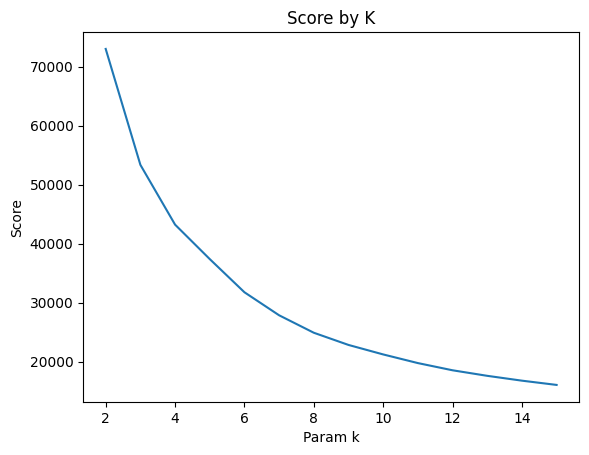

In [3]:
clustering.get_elbow_plot(
    k_options=range(2, 16),
    model_features_list=["avg_tv_rating", "avg_ova_rating", "avg_movie_rating", "avg_special_rating"],
    cv=3
)

In [4]:
clustering.train_model(k=4)

c:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:
pred_df = clustering.predict_clusters()
pred_df.head()

,user_id,avg_tv_rating,avg_ova_rating,avg_movie_rating,avg_special_rating,cluster
0,1,10.00,0.00,0.00,0.00,2
1,2,10.00,0.00,0.00,0.00,2
2,3,5.61,0.08,1.63,0.25,3
3,5,2.96,0.56,0.49,0.32,4
4,7,4.94,1.44,0.49,0.38,4


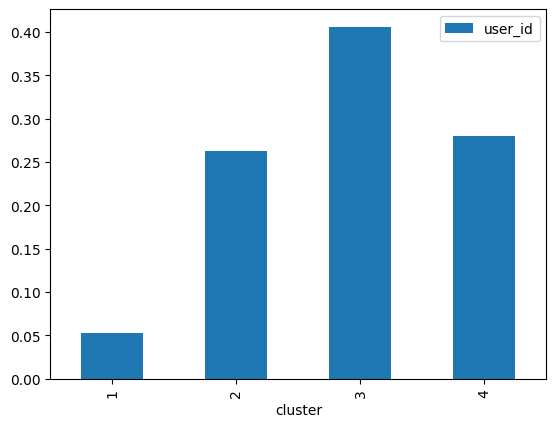

c:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


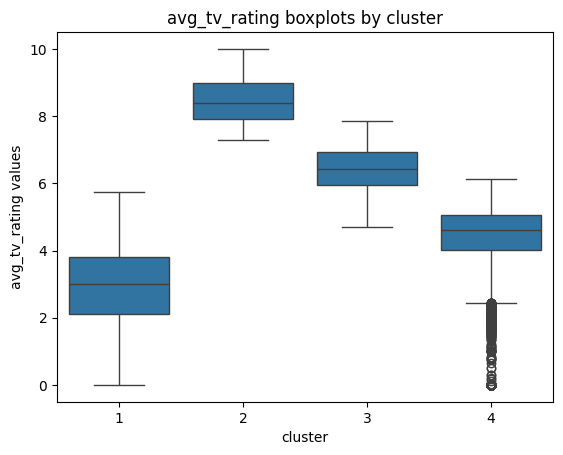

c:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


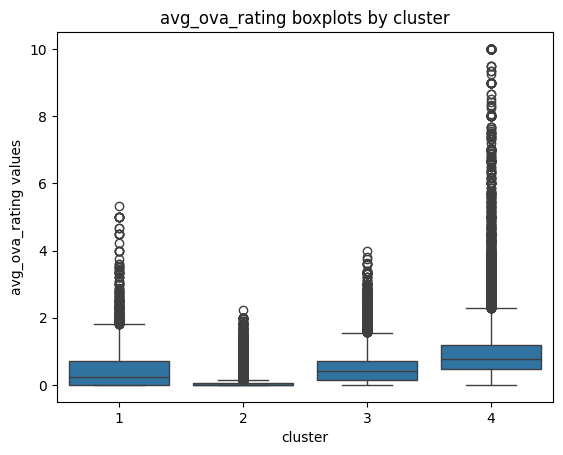

c:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


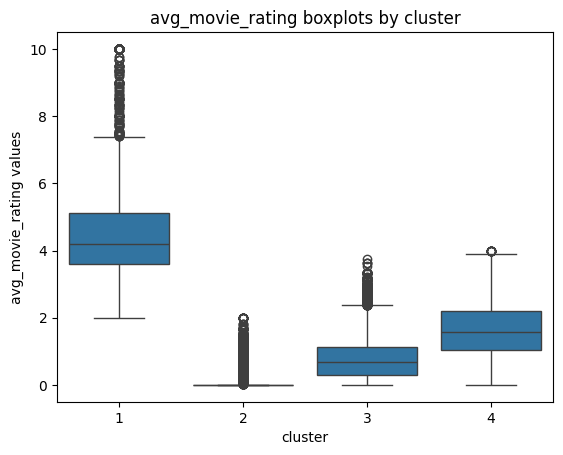

c:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


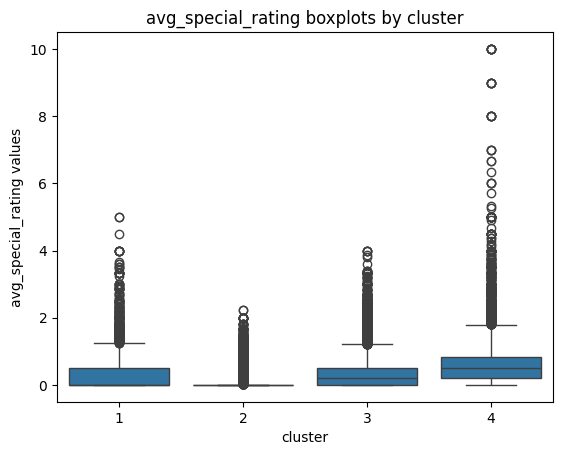

In [6]:
clustering.get_cluster_graphics(
    quantitative_vars=["avg_tv_rating", "avg_ova_rating", "avg_movie_rating", "avg_special_rating"]
)

<Axes: xlabel='cluster'>

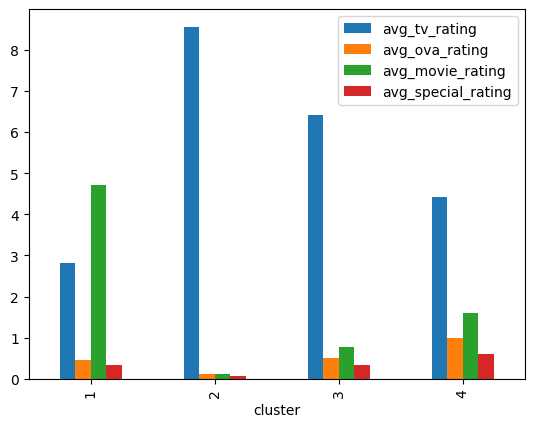

In [7]:
pred_df_temp = pred_df.copy()
pred_df_temp = pred_df_temp.astype(
    {
        "avg_tv_rating": "float64",
        "avg_ova_rating": "float64",
        "avg_movie_rating": "float64",
        "avg_special_rating": "float64",
    }
)
pred_df_temp.drop(columns=["user_id"], inplace=True)
pred_df_temp.groupby(["cluster"]).mean().plot.bar()